# Spark Assignment

## Ashish Singh (as9tq)

### In this Noteboook

1. Uploaded data for a Income classification problem, predicting whether an individual's income lie below or above $50K.

In [1]:
import pyspark
from os import listdir
from os.path import isfile, join
import boto3
import pandas as pd
from sagemaker import get_execution_role
from pyspark.sql.types import LongType, StringType, StructField, StructType, BooleanType, ArrayType, IntegerType

# Initialize the spark environment

In [2]:
conf = pyspark.SparkConf().setAppName('odl').setMaster('local')
sc = pyspark.SparkContext(conf=conf)
sqlc = pyspark.sql.SQLContext(sc)
sc

<SparkContext master=local appName=odl>

In [3]:
sqlc

## Connect to S3
There are a few ways to connect to S3, we are going to use boto
* boto3 - https://boto3.amazonaws.com/v1/documentation/api/latest/index.html

### Read into spark dataframe from csv in s3

In [4]:
role = get_execution_role()
bucket='odl-spark19spds6003-001'
data_key = 'as9tq/adult_classification.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)


In [5]:
pddf = pd.read_csv(data_location, names = ["age", "workclass","fnlwgt", "education",
                                                       "education_num","marital_status",
                                                       "occupation","relationship",
                                                       "race","sex","capital_gain",
                                                       "capital_loss","hours_per_week",
                                                       "native_country","target"])

In [6]:
pddf.dropna()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
pddf['target']=pddf['target'].astype('category')
pddf['workclass']=pddf['workclass'].astype('category')
pddf['education']=pddf['education'].astype('category')
pddf['marital_status']=pddf['marital_status'].astype('category')
pddf['occupation']=pddf['occupation'].astype('category')
pddf['relationship']=pddf['relationship'].astype('category')
pddf['race']=pddf['race'].astype('category')
pddf['sex']=pddf['sex'].astype('category')
pddf['native_country']=pddf['native_country'].astype('category')


In [8]:
pddf['target']= pddf['target'].cat.codes
pddf['workclass']=pddf['workclass'].cat.codes
pddf['education']=pddf['education'].cat.codes
pddf['marital_status']=pddf['marital_status'].cat.codes
pddf['occupation']=pddf['occupation'].cat.codes
pddf['relationship']=pddf['relationship'].cat.codes
pddf['race']=pddf['race'].cat.codes
pddf['sex']=pddf['sex'].cat.codes
pddf['native_country']=pddf['native_country'].cat.codes


In [9]:
pddf.target.value_counts()

0    24720
1     7841
Name: target, dtype: int64

In [10]:
pddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null int8
fnlwgt            32561 non-null int64
education         32561 non-null int8
education_num     32561 non-null int64
marital_status    32561 non-null int8
occupation        32561 non-null int8
relationship      32561 non-null int8
race              32561 non-null int8
sex               32561 non-null int8
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null int8
target            32561 non-null int8
dtypes: int64(6), int8(9)
memory usage: 1.8 MB


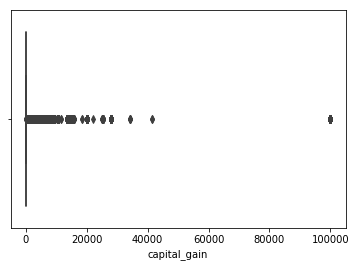

In [52]:
import seaborn as sns
sns.boxplot(x=pddf['capital_gain'])

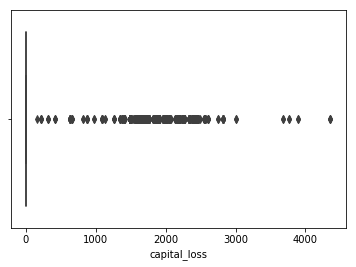

In [55]:
sns.boxplot(x=pddf['capital_loss'])

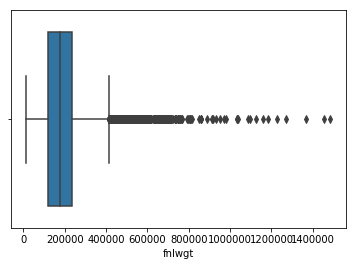

In [56]:
sns.boxplot(x=pddf['fnlwgt'])

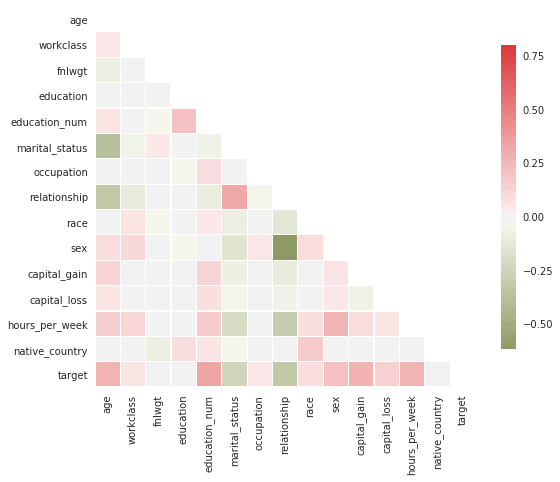

In [60]:
from string import ascii_letters
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="white")


# Compute the correlation matrix
corr = pddf.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(100, 12, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .8})

In [11]:
df = sqlc.createDataFrame(pddf)

In [12]:
df

DataFrame[age: bigint, workclass: bigint, fnlwgt: bigint, education: bigint, education_num: bigint, marital_status: bigint, occupation: bigint, relationship: bigint, race: bigint, sex: bigint, capital_gain: bigint, capital_loss: bigint, hours_per_week: bigint, native_country: bigint, target: bigint]

### Write parquet to s3

In [13]:
parquetPath = '/home/ec2-user/SageMaker/as9tq/as9tq-pqt3'
df.write.parquet(parquetPath)

In [14]:
# prep list of files to transfer
files = [f for f in listdir(parquetPath) if isfile(join(parquetPath, f))]

s3 = boto3.resource('s3')
for f in files:
    #print('copying {} to {}'.format(parquetPath+'/'+f,"sample_data/"+f))
    s3.Bucket(bucket).upload_file(parquetPath+'/'+f, "as9tq-pqt3/"+f)


### Write to spark dataframe from parquet

In [15]:
df = sqlc.read.parquet(parquetPath)

In [16]:
df

DataFrame[age: bigint, workclass: bigint, fnlwgt: bigint, education: bigint, education_num: bigint, marital_status: bigint, occupation: bigint, relationship: bigint, race: bigint, sex: bigint, capital_gain: bigint, capital_loss: bigint, hours_per_week: bigint, native_country: bigint, target: bigint]

## Using MLlib

### Convention
* df = spark dataframe
* pddf = pandas dataframe


## Exploratory analysis


In [17]:
display(df)

DataFrame[age: bigint, workclass: bigint, fnlwgt: bigint, education: bigint, education_num: bigint, marital_status: bigint, occupation: bigint, relationship: bigint, race: bigint, sex: bigint, capital_gain: bigint, capital_loss: bigint, hours_per_week: bigint, native_country: bigint, target: bigint]

In [18]:
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- workclass: long (nullable = true)
 |-- fnlwgt: long (nullable = true)
 |-- education: long (nullable = true)
 |-- education_num: long (nullable = true)
 |-- marital_status: long (nullable = true)
 |-- occupation: long (nullable = true)
 |-- relationship: long (nullable = true)
 |-- race: long (nullable = true)
 |-- sex: long (nullable = true)
 |-- capital_gain: long (nullable = true)
 |-- capital_loss: long (nullable = true)
 |-- hours_per_week: long (nullable = true)
 |-- native_country: long (nullable = true)
 |-- target: long (nullable = true)



In [19]:
df.take(5)

[Row(age=39, workclass=7, fnlwgt=77516, education=9, education_num=13, marital_status=4, occupation=0, relationship=1, race=4, sex=1, capital_gain=2174, capital_loss=0, hours_per_week=40, native_country=39, target=0),
 Row(age=50, workclass=6, fnlwgt=83311, education=9, education_num=13, marital_status=2, occupation=3, relationship=0, race=4, sex=1, capital_gain=0, capital_loss=0, hours_per_week=13, native_country=39, target=0),
 Row(age=38, workclass=4, fnlwgt=215646, education=11, education_num=9, marital_status=0, occupation=5, relationship=1, race=4, sex=1, capital_gain=0, capital_loss=0, hours_per_week=40, native_country=39, target=0),
 Row(age=53, workclass=4, fnlwgt=234721, education=1, education_num=7, marital_status=2, occupation=5, relationship=0, race=2, sex=1, capital_gain=0, capital_loss=0, hours_per_week=40, native_country=39, target=0),
 Row(age=28, workclass=4, fnlwgt=338409, education=9, education_num=13, marital_status=2, occupation=10, relationship=5, race=2, sex=0, 

## Model Development 

1. Split data into train/test
2. Vectorization

In [22]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors

In [23]:
assembler = VectorAssembler(
    inputCols=["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country"],
    outputCol="features")


In [24]:
output = assembler.transform(df)
output.select("features", "target").show(truncate=False)

+-----------------------------------------------------------------------+------+
|features                                                               |target|
+-----------------------------------------------------------------------+------+
|[39.0,7.0,77516.0,9.0,13.0,4.0,0.0,1.0,4.0,1.0,2174.0,0.0,40.0,39.0]   |0     |
|[50.0,6.0,83311.0,9.0,13.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,13.0,39.0]      |0     |
|[38.0,4.0,215646.0,11.0,9.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,40.0,39.0]     |0     |
|[53.0,4.0,234721.0,1.0,7.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,40.0,39.0]      |0     |
|[28.0,4.0,338409.0,9.0,13.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,40.0,4.0]     |0     |
|[37.0,4.0,284582.0,12.0,14.0,2.0,3.0,5.0,4.0,0.0,0.0,0.0,40.0,39.0]    |0     |
|[49.0,4.0,160187.0,6.0,5.0,3.0,8.0,1.0,2.0,0.0,0.0,0.0,16.0,22.0]      |0     |
|[52.0,6.0,209642.0,11.0,9.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,45.0,39.0]     |1     |
|[31.0,4.0,45781.0,12.0,14.0,4.0,10.0,1.0,4.0,0.0,14084.0,0.0,50.0,39.0]|1     |
|[42.0,4.0,159449.0,9.0,13.0

In [36]:
df = output.selectExpr("target as label", "features as features")

In [40]:
# create train/test sets
seed = 42
(testDF, trainingDF) = df.randomSplit((0.20, 0.80), seed=seed)
print ('training set N = {}, test set N = {}'.format(trainingDF.count(),testDF.count()))

training set N = 25960, test set N = 6601


### Build A Logistics Regression Model

Note: I have used the standard code provided on the Spark website to create a logistic regression model

In [48]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(trainingDF)

# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

# We can also use the multinomial family for binary classification
mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")

# Fit the model
mlrModel = mlr.fit(trainingDF)

# Print the coefficients and intercepts for logistic regression with multinomial family
print("Multinomial coefficients: " + str(mlrModel.coefficientMatrix))
print("Multinomial intercepts: " + str(mlrModel.interceptVector))

Coefficients: (14,[],[])
Intercept: -1.1569925954017435
Multinomial coefficients: 2 X 14 CSRMatrix

Multinomial intercepts: [0.5784961003990365,-0.5784961003990365]


In [49]:
trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

objectiveHistory:
0.5501724304366523
+---+---+
|FPR|TPR|
+---+---+
|0.0|0.0|
|1.0|1.0|
|1.0|1.0|
+---+---+

areaUnderROC: 0.5


LogisticRegression_4d51b6f47d0798893425